<a href="https://colab.research.google.com/github/tesseract-pynomaly/Megatron-LM/blob/main/Tutorial_Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target_names[data.target]

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [3]:
df.shape

(569, 31)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
features = df.iloc[:,:-1]
predictions = df.iloc[:, -1]

In [6]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
predictions.head()

,target
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant


In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [17]:
features_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=42, shuffle=True )


In [69]:
Train_data = pd.concat([X_train, y_train], axis='columns')
Train_data['target'] = Train_data['target'].map({'benign': 0, 'malignant': 1})
Train_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432,0
181,1.977508,1.694187,2.089619,1.866047,1.262455,3.389643,2.007548,2.596960,2.129892,1.585220,...,1.270634,2.062335,2.124291,0.733436,3.207003,1.946890,2.675218,1.936879,2.463465,1
63,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838,-0.318972,-0.363081,-0.699511,1.932741,0.968562,...,-1.049890,-1.241212,-1.002860,-1.490797,-0.550038,-0.635617,-0.970486,0.616770,0.052877,0
248,-0.987600,1.380033,-0.986877,-0.875668,0.014925,-0.606466,-0.816190,-0.845247,0.311723,0.069801,...,1.549097,-0.872165,-0.746907,0.768505,-0.728158,-0.766109,-0.810759,0.822228,-0.137199,0
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,-0.929077,3.400421,0.964310,...,-1.339752,-1.114026,-0.900022,-0.213419,-0.989865,-1.201820,-1.352369,1.061659,-0.207578,0


In [70]:
Train_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,-0.002743,-0.024345,-0.003575,-0.001455,-0.043856,-0.013677,0.001241,-0.016489,-0.002307,-0.005790,...,-0.023047,-0.004709,-0.006322,-0.036667,-0.009690,0.011543,-0.006456,0.006902,-0.004321,0.371429
std,1.004222,0.992728,1.001829,1.009495,0.990837,0.994394,0.997717,0.981724,1.003546,1.022052,...,0.987665,0.994092,0.997919,1.011842,0.986107,1.004592,0.994694,1.021648,0.989056,0.483719
min,-1.827998,-2.229249,-1.814389,-1.377937,-3.112085,-1.610136,-1.114873,-1.261820,-2.353466,-1.819865,...,-2.223994,-1.571835,-1.154919,-2.682695,-1.443878,-1.305831,-1.745063,-2.160960,-1.601839,0.000000
25%,-0.687965,-0.725963,-0.694839,-0.667195,-0.749748,-0.785557,-0.746761,-0.737170,-0.705065,-0.730436,...,-0.754329,-0.685259,-0.640114,-0.787669,-0.695396,-0.746679,-0.771626,-0.656424,-0.714632,0.000000
50%,-0.234963,-0.141869,-0.246689,-0.293480,-0.123848,-0.253400,-0.342240,-0.400043,-0.071627,-0.186785,...,-0.074456,-0.285682,-0.341005,-0.064377,-0.280951,-0.219671,-0.243568,-0.119321,-0.215336,0.000000
75%,0.458032,0.534144,0.485260,0.320561,0.582825,0.510913,0.546778,0.644227,0.534430,0.468148,...,0.653456,0.517940,0.265299,0.599737,0.555572,0.551770,0.707942,0.447712,0.450208,1.000000
max,3.971288,4.651889,3.976130,5.250529,4.770911,3.924075,4.243589,3.927930,4.484751,4.910919,...,3.885905,4.287337,5.930172,3.771263,4.348873,4.700669,2.685877,6.046041,4.935010,1.000000


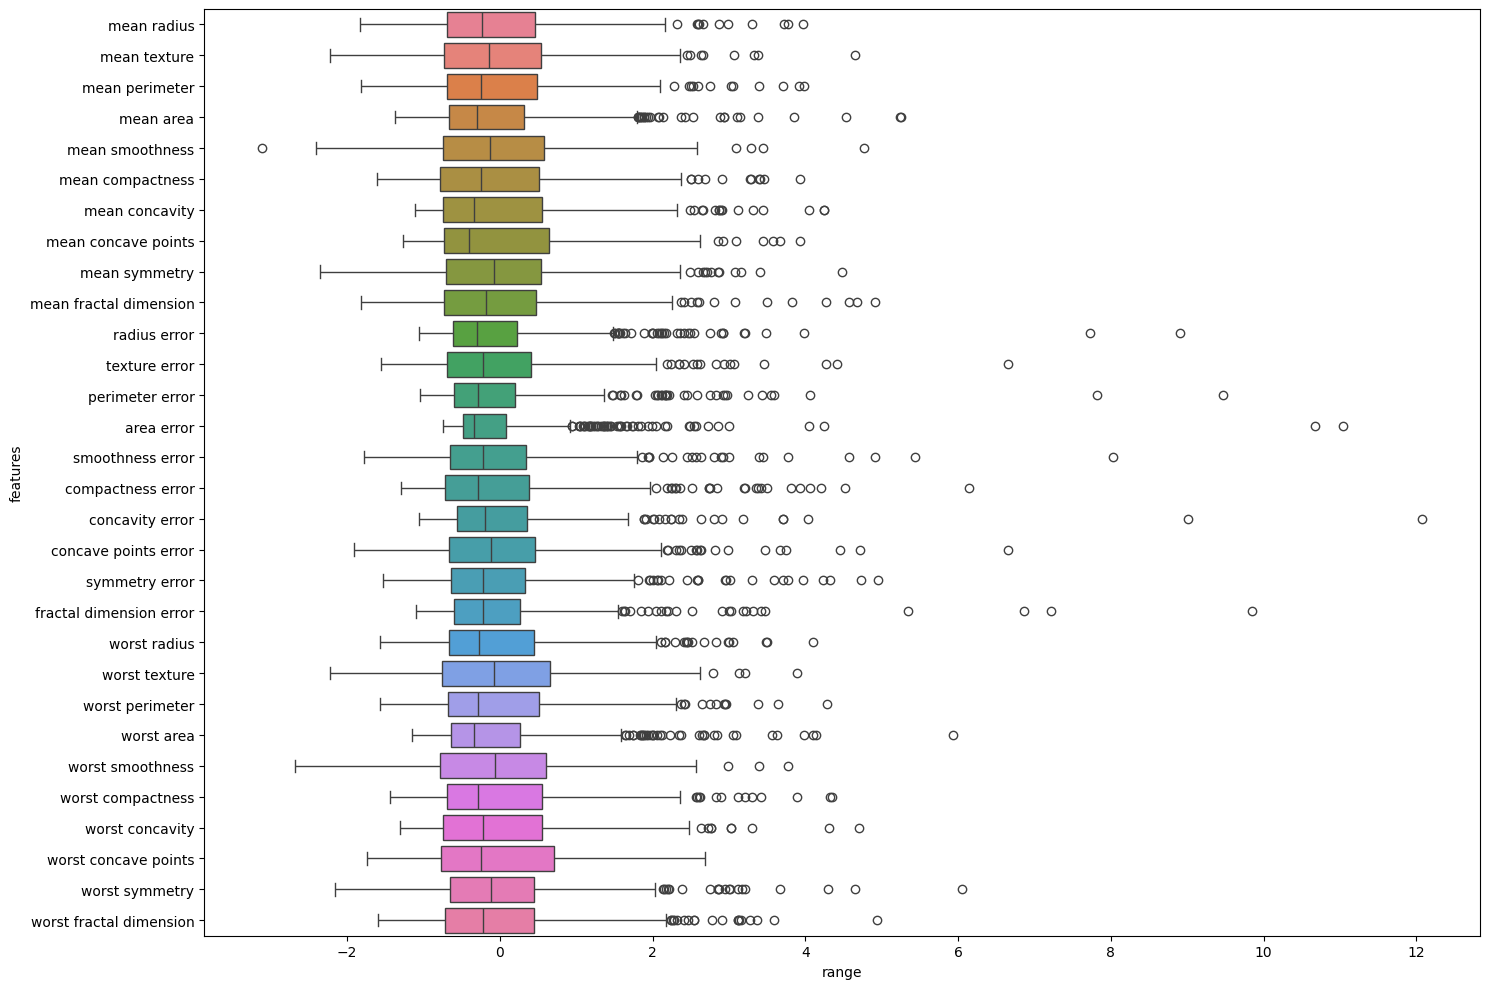

In [71]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.tight_layout()

In [72]:
corr_mat = Train_data.corr(method ='pearson')
corr_mat

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.306881,0.997850,0.986609,0.173051,0.477986,0.647311,0.812377,0.150386,-0.335575,...,0.287590,0.963536,0.941849,0.121926,0.386325,0.496800,0.722309,0.168092,-0.024337,0.718073
mean texture,0.306881,1.000000,0.313124,0.300314,0.009475,0.229954,0.282160,0.286231,0.108045,-0.079010,...,0.909718,0.340226,0.318693,0.093301,0.274007,0.282771,0.299703,0.122984,0.102868,0.416213
mean perimeter,0.997850,0.313124,1.000000,0.985985,0.210092,0.529721,0.688251,0.842081,0.185885,-0.286307,...,0.294406,0.969674,0.943283,0.153170,0.430426,0.535560,0.751413,0.191948,0.020731,0.731859
mean area,0.986609,0.300314,0.985985,1.000000,0.180709,0.471296,0.659793,0.814273,0.152679,-0.305321,...,0.274861,0.955701,0.959723,0.127772,0.364068,0.484949,0.700435,0.144752,-0.026035,0.695171
mean smoothness,0.173051,0.009475,0.210092,0.180709,1.000000,0.672342,0.536920,0.564538,0.539744,0.577171,...,0.075452,0.251658,0.219265,0.808290,0.492527,0.458749,0.526387,0.385244,0.521392,0.375137
mean compactness,0.477986,0.229954,0.529721,0.471296,0.672342,1.000000,0.877467,0.825932,0.620483,0.569638,...,0.247127,0.573716,0.493183,0.572021,0.867774,0.813566,0.817321,0.506480,0.691960,0.590554
mean concavity,0.647311,0.282160,0.688251,0.659793,0.536920,0.877467,1.000000,0.914671,0.519030,0.349280,...,0.289986,0.710338,0.659259,0.457626,0.751516,0.884079,0.855087,0.416326,0.519451,0.683262
mean concave points,0.812377,0.286231,0.842081,0.814273,0.564538,0.825932,0.914671,1.000000,0.476735,0.160184,...,0.300338,0.855666,0.811102,0.467630,0.664415,0.748041,0.910680,0.391108,0.363804,0.778115
mean symmetry,0.150386,0.108045,0.185885,0.152679,0.539744,0.620483,0.519030,0.476735,1.000000,0.482673,...,0.138865,0.229285,0.183576,0.416854,0.508593,0.461163,0.464676,0.699251,0.476875,0.348123
mean fractal dimension,-0.335575,-0.079010,-0.286307,-0.305321,0.577171,0.569638,0.349280,0.160184,0.482673,1.000000,...,-0.053244,-0.221453,-0.246204,0.495491,0.467774,0.364380,0.186256,0.317793,0.784537,-0.014308


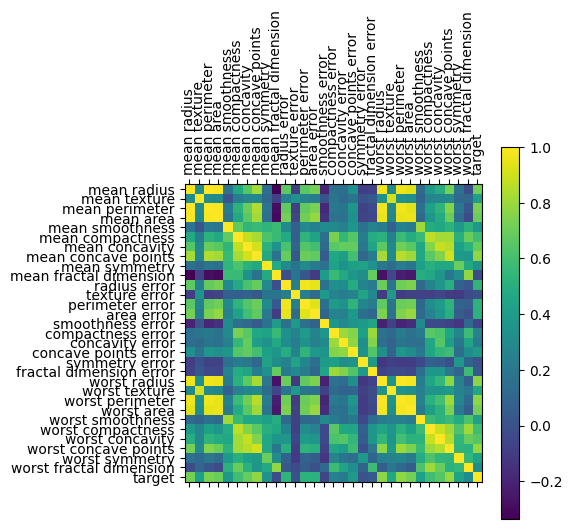

In [73]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [74]:
values, counts = np.unique(y_train, return_counts=True)
print(values)
print(counts)

['benign' 'malignant']
[286 169]


In [75]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import f1_score, confusion_matrix

F1_train = f1_score(y_train, y_pred_train, pos_label='malignant')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)

print("Evaluation metrics: Train Data")
print("Train F1 score:", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

F1 = f1_score(y_test, y_pred, pos_label='malignant')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score:" , np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score: 0.982
Train confusion matrix: 
 [[283   3]
 [  3 166]]
Test F1 score: 0.943
Test confusion matrix: 
 [[68  3]
 [ 2 41]]


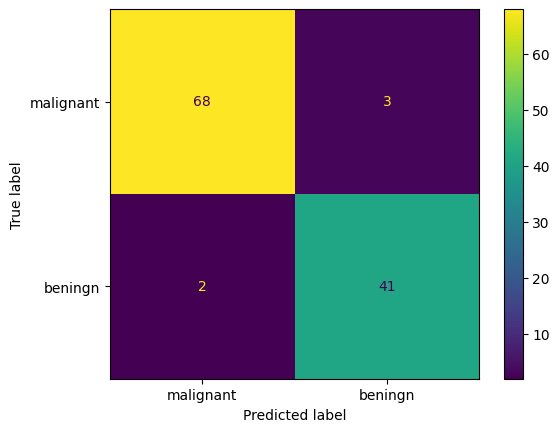

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels={'beningn','malignant'})
disp.plot()
plt.show()